In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
df1=pd.read_csv("C:/Users/DELL/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [3]:
df1.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
l=[]
for i in df1:
    l.append(df1[i].unique())


In [6]:
##unique value of data frame
print(l)


[array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64), array(['Yes', 'No'], dtype=object), array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object), array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871

In [7]:
for i in range(len(l)):
    if len(l[i])==1:
        print(i)

8
21
26


In [8]:
##removing unique columns
df1=df1.drop([df1.columns[8],df1.columns[21],df1.columns[26]],axis=1)

In [9]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [10]:
df1=df1.drop(["EmployeeNumber"],axis=1)

In [11]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
df1.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [13]:
df1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [14]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


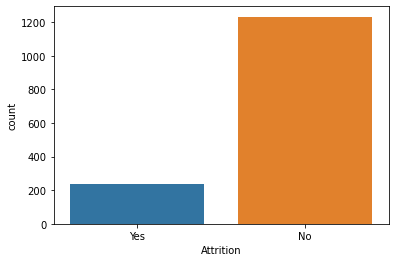

In [15]:
##Data Visualization
sns.countplot(df1['Attrition'], label = "Count") 

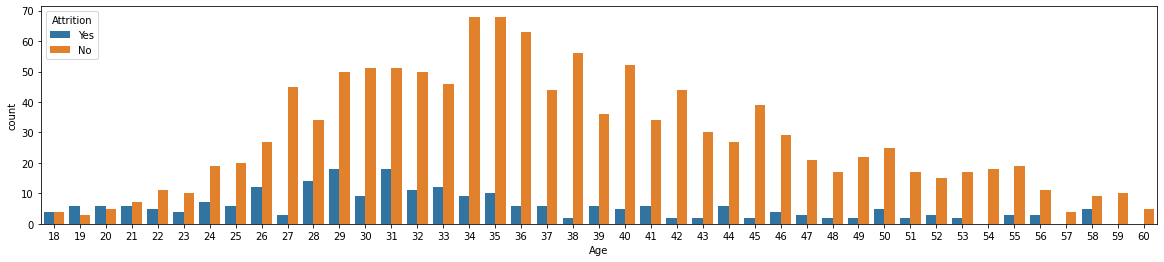

In [16]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Age",hue="Attrition",data=df1)
##inference more people from the age of 28-35 left the company(81 member)

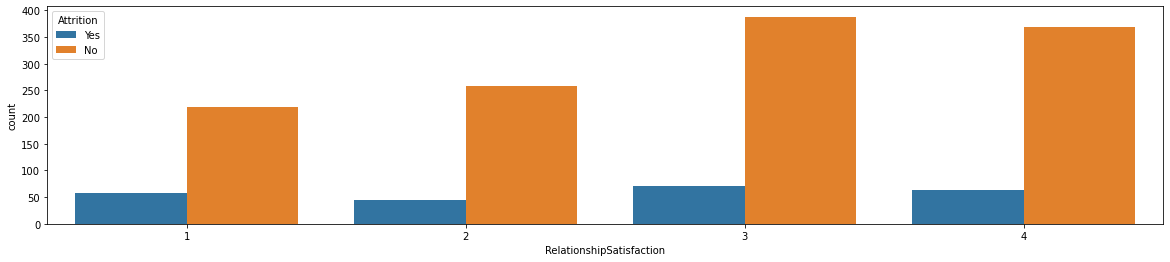

In [17]:
plt.subplots(figsize=(20,4))
sns.countplot(x="RelationshipSatisfaction",hue="Attrition",data=df1)


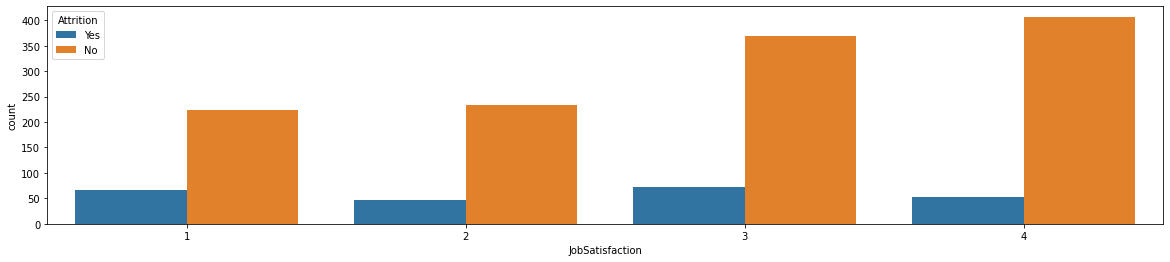

In [18]:
plt.subplots(figsize=(20,4))
sns.countplot(x="JobSatisfaction",hue="Attrition",data=df1)

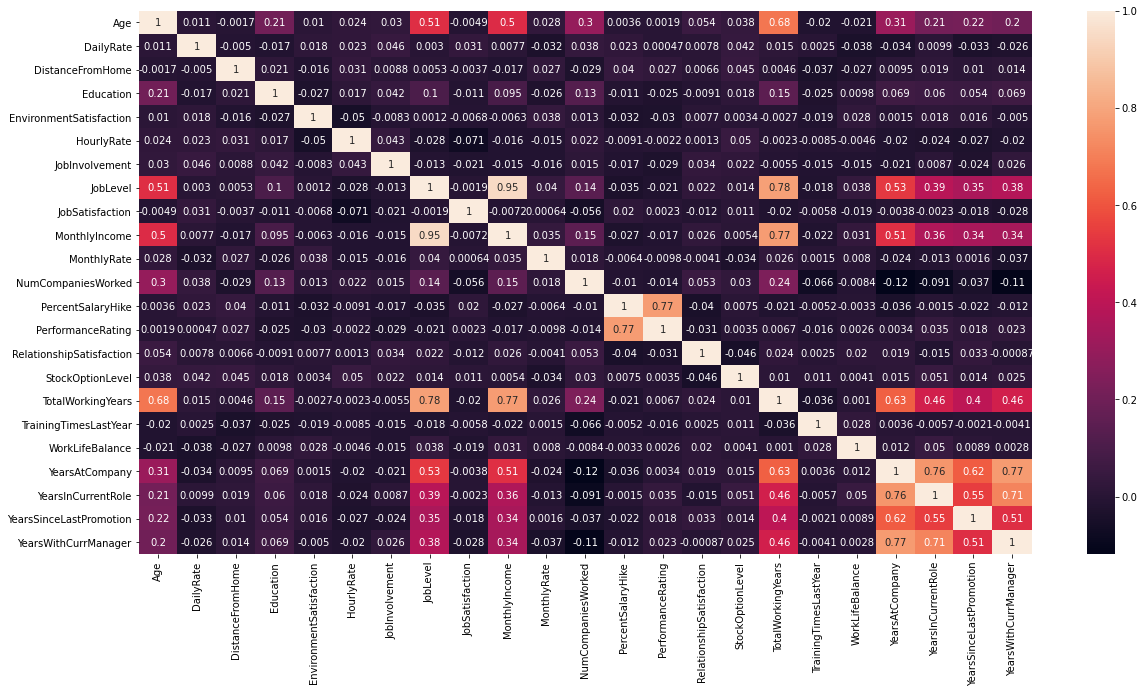

In [20]:
##correlation 
plt.figure(figsize=(20,10)) 
sns.heatmap(df1.corr(),annot=True) 

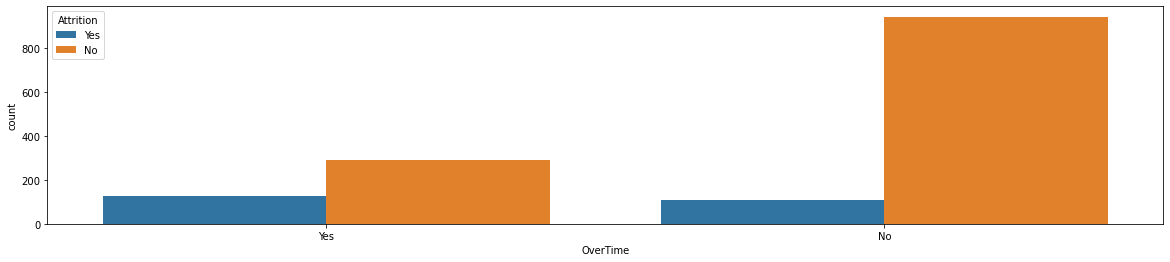

In [21]:
plt.subplots(figsize=(20,4))
sns.countplot(x="OverTime",hue="Attrition",data=df1)
#NEARLY 100 EMPLOYEES LEFT THE COMPANY

In [22]:
df1["OverTime"]

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

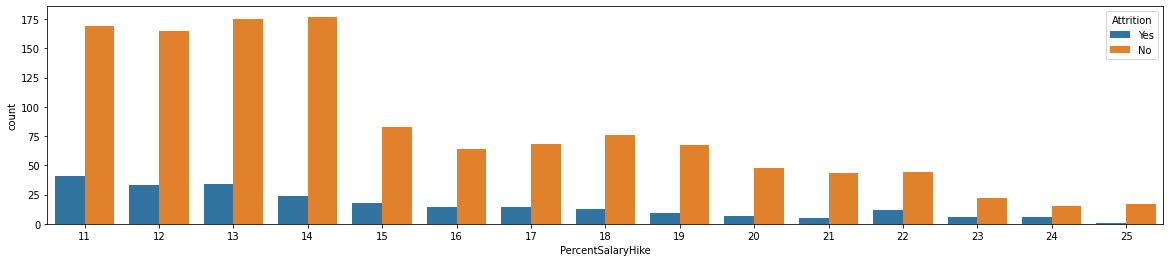

In [23]:
plt.subplots(figsize=(20,4))
sns.countplot(x="PercentSalaryHike",hue="Attrition",data=df1)
##PercentSalaryHike with less than 17-18% employees left the company

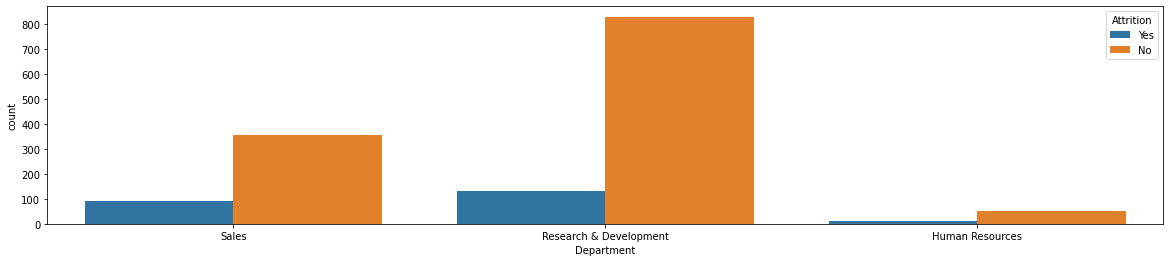

In [24]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Department",hue="Attrition",data=df1)
## sales and rd employees left the company(200)

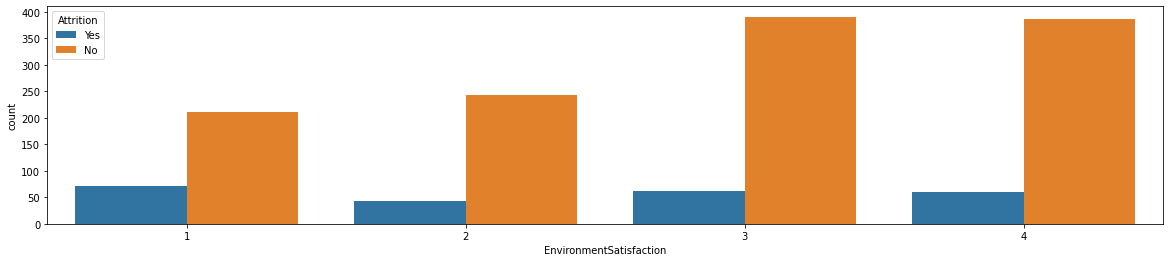

In [25]:
plt.subplots(figsize=(20,4))
sns.countplot(x="EnvironmentSatisfaction",hue="Attrition",data=df1)

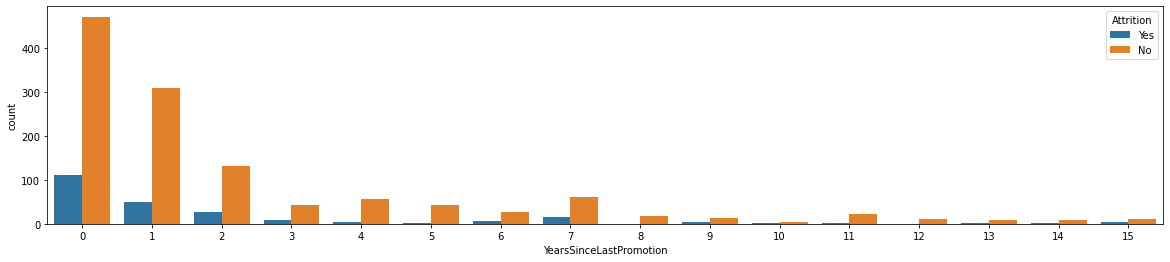

In [26]:
plt.subplots(figsize=(20,4))
sns.countplot(x="YearsSinceLastPromotion",hue="Attrition",data=df1)
##employee with YearsSinceLastPromotion less than 0-2 years left the company

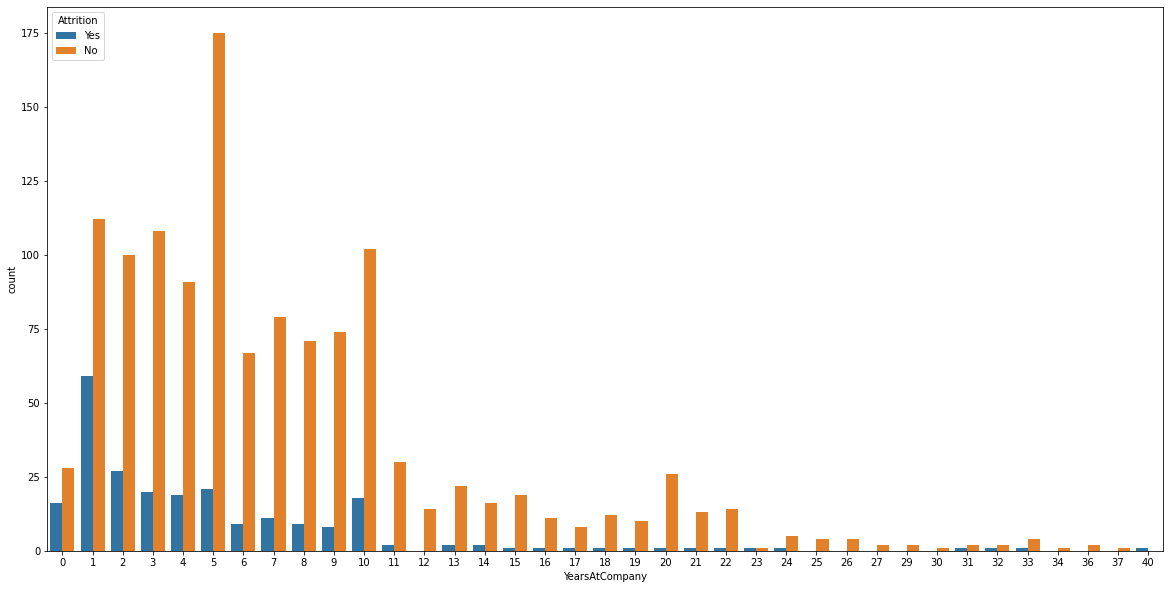

In [27]:
plt.subplots(figsize=(20,10))
sns.countplot(x="YearsAtCompany",hue="Attrition",data=df1)
##Employees working in company for less than 5 years left the company(freshers)

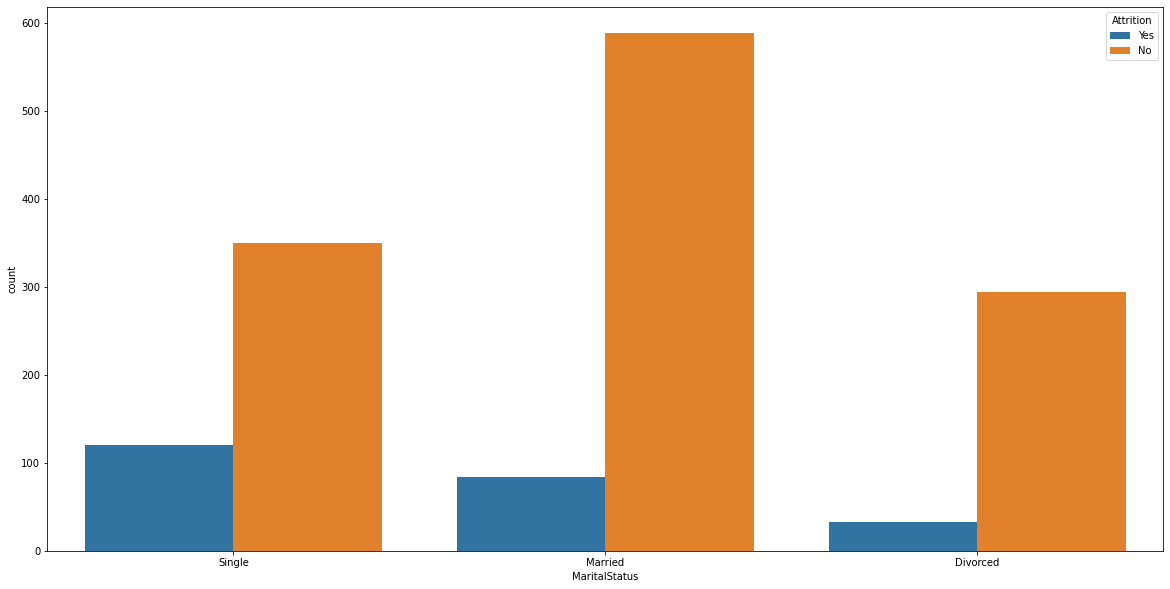

In [28]:
plt.subplots(figsize=(20,10))
sns.countplot(x="MaritalStatus",hue="Attrition",data=df1)
##single members left the company

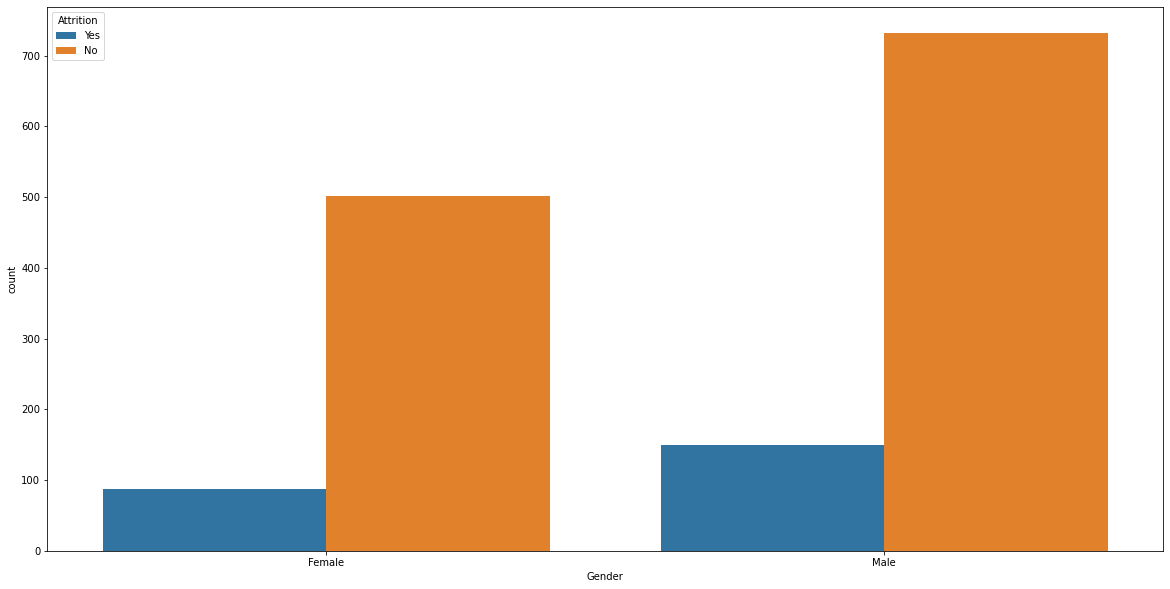

In [29]:
plt.subplots(figsize=(20,10))
sns.countplot(x="Gender",hue="Attrition",data=df1)

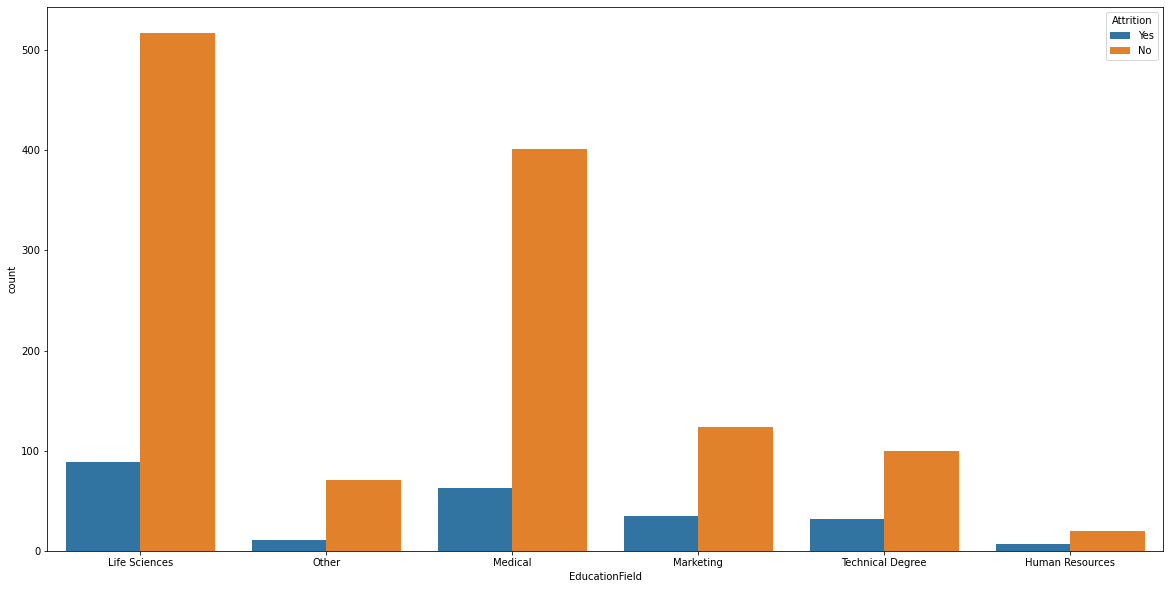

In [30]:
plt.subplots(figsize=(20,10))
sns.countplot(x="EducationField",hue="Attrition",data=df1)

In [31]:
##Final Inference
##1)should concentrate more on fresher(working in company for less than 4-5 years)
##2)no overtime
##3)concentrate on RD and sales
##4)hike less than 15%
##5)age group between 28-35 are leaving the company
##6)single,male, employees are leaving the company
##7)Life sciences,medical mostly left the company(EducationField)

In [32]:
##One hot encoding
from sklearn.preprocessing import LabelEncoder
for i in df1.columns:
    if df1[i].dtype==np.number:
        continue
    df1[i]=LabelEncoder().fit_transform(df1[i])

In [33]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


In [34]:
##dependent variable
b=df1.iloc[:,1].values    

In [35]:
b

array([1, 0, 1, ..., 0, 0, 0])

In [36]:
df2=df1.drop("Attrition",axis=1)

In [37]:
a=df2.iloc[:,0:].values   ##independent variables
a1=df2.iloc[:,0:].values

In [38]:
a

array([[ 23,   2, 624, ...,   4,   0,   5],
       [ 31,   1, 113, ...,   7,   1,   7],
       [ 19,   2, 805, ...,   0,   0,   0],
       ...,
       [  9,   2,  39, ...,   2,   0,   3],
       [ 31,   1, 579, ...,   6,   0,   8],
       [ 16,   2, 336, ...,   3,   1,   2]], dtype=int64)

In [39]:
##normalization
a.min(),a.max()

(0, 1426)

In [40]:
a=a/1426

In [41]:
a


array([[0.01612903, 0.00140252, 0.43758766, ..., 0.00280505, 0.        ,
        0.00350631],
       [0.02173913, 0.00070126, 0.07924264, ..., 0.00490884, 0.00070126,
        0.00490884],
       [0.01332398, 0.00140252, 0.56451613, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00631136, 0.00140252, 0.02734923, ..., 0.00140252, 0.        ,
        0.00210379],
       [0.02173913, 0.00070126, 0.40603086, ..., 0.00420757, 0.        ,
        0.0056101 ],
       [0.0112202 , 0.00140252, 0.23562412, ..., 0.00210379, 0.00070126,
        0.00140252]])

In [42]:
from sklearn.model_selection import train_test_split
atrain,atest,btrain,btest = train_test_split(a,b,test_size=0.3)
atrain.shape,atest.shape,btrain.shape,btest.shape

((1029, 30), (441, 30), (1029,), (441,))

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=15)
clf.fit(atrain,btrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
clf.score(atrain,btrain)

0.9990281827016521

In [46]:
bpred=clf.predict(atest)

In [47]:
from sklearn import metrics
metrics.accuracy_score(btest,bpred)

0.8594104308390023

In [48]:
cm = metrics.confusion_matrix(btest,bpred)
print(cm)

[[366   5]
 [ 57  13]]


In [49]:
##NO NORMALIZATION
a1=df2.iloc[:,0:].values   ##independent variables
b=df1.iloc[:,1].values    ##dependent variable

In [50]:
a1

array([[ 23,   2, 624, ...,   4,   0,   5],
       [ 31,   1, 113, ...,   7,   1,   7],
       [ 19,   2, 805, ...,   0,   0,   0],
       ...,
       [  9,   2,  39, ...,   2,   0,   3],
       [ 31,   1, 579, ...,   6,   0,   8],
       [ 16,   2, 336, ...,   3,   1,   2]], dtype=int64)

In [51]:
from sklearn.model_selection import train_test_split
ctrain,ctest,dtrain,dtest = train_test_split(a1,b,test_size=0.3)
ctrain.shape,ctest.shape,ctrain.shape,ctest.shape

((1029, 30), (441, 30), (1029, 30), (441, 30))

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=15)
clf.fit(ctrain,dtrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
clf.score(ctrain,dtrain)

0.9951409135082604

In [54]:
dpred=clf.predict(ctest)

In [55]:
from sklearn import metrics
metrics.accuracy_score(dtest,dpred)

0.8775510204081632

In [56]:
cm = metrics.confusion_matrix(dtest,dpred)
print(cm)

[[376   2]
 [ 52  11]]


In [57]:
#SVM MODEL(no normalization)
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

model = SVC()
model.fit(ctrain,dtrain)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
##score
model.score(ctrain,dtrain)

0.8309037900874635

In [59]:
from sklearn import metrics
dpred = model.predict(ctest)


In [60]:
cm = metrics.confusion_matrix(dtest,dpred)
print(cm)
print(classification_report(dtest,dpred))


[[378   0]
 [ 63   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       378
           1       0.00      0.00      0.00        63

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.73      0.86      0.79       441



D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#SVM MODEL(normalization)
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

model = SVC()
model.fit(atrain,btrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
##score
model.score(atrain,btrain)

0.8377065111758989

In [63]:
from sklearn import metrics
bpred = model.predict(atest)
cm = metrics.confusion_matrix(btest,bpred)
print(cm)

[[371   0]
 [ 70   0]]


In [64]:
print(classification_report(btest,bpred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] C=0.1, coef0=0, gamma=0.1, kernel=rbf ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=0.1, coef0=0, gamma=0.1, kernel=rbf, total=   0.4s
[CV] C=0.1, coef0=0, gamma=0.1, kernel=rbf ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............ C=0.1, coef0=0, gamma=0.1, kernel=rbf, total=   0.6s
[CV] C=0.1, coef0=0, gamma=0.1, kernel=rbf ...........................
[CV] ............ C=0.1, coef0=0, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=0.1, coef0=0, gamma=0.1, kernel=rbf ...........................
[CV] ............ C=0.1, coef0=0, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=0.1, coef0=0, gamma=0.1, kernel=rbf ...........................
[CV] ............ C=0.1, coef0=0, gamma=0.1, kernel=rbf, total=   0.4s
[CV] C=0.1, coef0=0, gamma=0.1, kernel=poly ..........................
